## 数据生成 data generation

模拟生成分类数据点

Simulate generating points of classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. 生成训练数据 (Generate training data)
np.random.seed(42)  # 为了结果的可重复性 (For reproducibility)

train_size = 1000
train_data = np.random.rand(train_size, 1) * 1000  # 0 到 1000 范围内的随机数 (Random numbers in the range 0 to 1000)
train_labels = (train_data[:, 0] > 100).astype(int)  # 大于100为1，否则为0 (1 if greater than 100, else 0)

# 2. 生成测试数据 (Generate test data)
random_test_size = 10
random_test_data = np.random.rand(random_test_size, 1) * 1000
random_expected_labels = (random_test_data[:, 0] > 100).astype(int)

# 添加特定的测试点 (Add specific test points)
specific_test_data = np.array([[80], [90], [95], [98], [99], [101], [103], [105], [110]])
specific_expected_labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

# 合并测试数据 (Combine test data)
test_data = np.vstack((random_test_data, specific_test_data))
expected_labels = np.concatenate((random_expected_labels, specific_expected_labels))

## 随机森林分类 Random Forest Classification

使用随机森林进行分类

Use random forest for data classification

In [3]:
# 3. 标准化数据 (Standardize data)
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# 4. 使用随机森林分类器 (Use RandomForestClassifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data_scaled, train_labels)

# 5. 预测测试数据 (Predict on the test data)
predicted_labels = rf_classifier.predict(test_data_scaled)

# 6. 计算准确率 (Compute accuracy)
accuracy = accuracy_score(expected_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


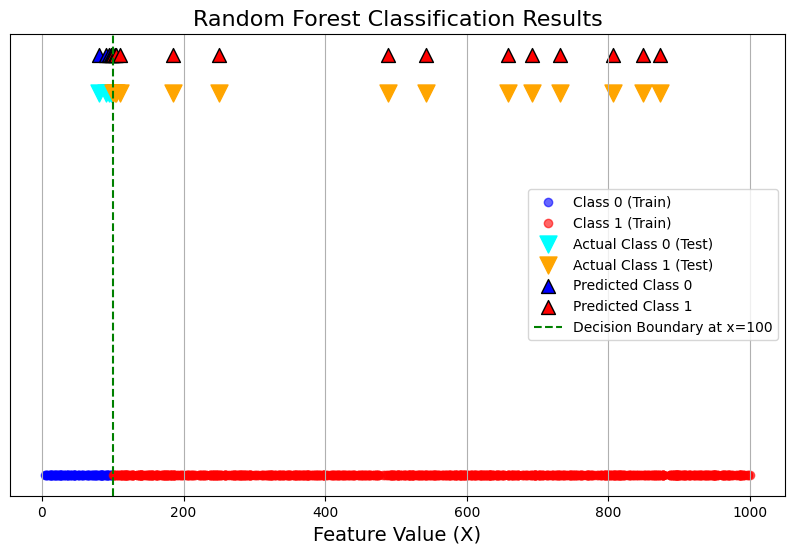

In [16]:
# 7. 绘制训练数据和测试数据 (Plot training data and test data)

# 绘制训练数据 (Plot training data)
plt.figure(figsize=(10, 6))
plt.scatter(train_data[train_labels == 0], np.zeros_like(train_data[train_labels == 0]), color='blue', label='Class 0 (Train)', alpha=0.6)
plt.scatter(train_data[train_labels == 1], np.zeros_like(train_data[train_labels == 1]), color='red', label='Class 1 (Train)', alpha=0.6)

# 绘制测试数据 (Plot test data)
plt.scatter(test_data[expected_labels == 0], np.ones_like(test_data[expected_labels == 0]), color='cyan', label='Actual Class 0 (Test)', marker='v', s=150)
plt.scatter(test_data[expected_labels == 1], np.ones_like(test_data[expected_labels == 1]), color='orange', label='Actual Class 1 (Test)', marker='v', s=150)

# 绘制模型的预测结果 (Plot model's predicted labels)
plt.scatter(test_data[predicted_labels == 0], np.ones_like(test_data[predicted_labels == 0]) * 1.1, color='blue', label='Predicted Class 0', marker='^', edgecolor='k', s=100)
plt.scatter(test_data[predicted_labels == 1], np.ones_like(test_data[predicted_labels == 1]) * 1.1, color='red', label='Predicted Class 1', marker='^', edgecolor='k', s=100)

# 设置图的细节 (Setup plot details)
plt.axvline(x=100, color='green', linestyle='--', label='Decision Boundary at x=100')
plt.yticks([])  # 隐藏y轴刻度 (Hide y-axis ticks)
plt.title("Random Forest Classification Results", fontsize=16)
plt.xlabel("Feature Value (X)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 检查节点 check nodes

检查随机森林节点

check nodes of random forrest

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


# 5. 抽取随机森林中的几棵树 (Extract a few trees from the forest)
# 抽取第1棵和第2棵树 (Extract the 1st and 2nd tree)
tree_1 = rf_classifier.estimators_[0]
tree_2 = rf_classifier.estimators_[1]

# 可视化第1棵树 (Visualize the first tree using graphviz)
dot_data_1 = export_graphviz(tree_1, out_file=None, 
                             feature_names=["Scaled X"],  
                             class_names=["Class 0", "Class 1"],
                             filled=True, rounded=True,  
                             special_characters=True) 
graph_1 = graphviz.Source(dot_data_1)  
graph_1.render("random_forest_tree_1", format="png")  # 导出为PNG文件 (Export to PNG)

# 可视化第2棵树 (Visualize the second tree using graphviz)
dot_data_2 = export_graphviz(tree_2, out_file=None, 
                             feature_names=["Scaled X"],  
                             class_names=["Class 0", "Class 1"],
                             filled=True, rounded=True,  
                             special_characters=True) 
graph_2 = graphviz.Source(dot_data_2)  
graph_2.render("random_forest_tree_2", format="png")  # 导出为PNG文件 (Export to PNG)

'random_forest_tree_2.png'

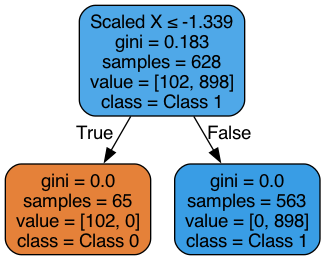